![logo.jpg](logo.jpg) 
### Report photométrique de la supernova ***SN 2019ein***<br>

###### Dominique Touzan.
###### 1. https://sites.google.com/view/astronomie-ut1/accueil
###### 2. dtouzan@gmail.com
###### 3. Jupyter Notebook : https://github.com/dtouzan/sn2019ein/blob/master/sn2019ein.ipynb

###### **Édition**   1.0, révision  16/06/2019 - 07/07/2019

##### **Résumé** : Le suivi de la supernova sn 2019ein durant un mois et demi de mi-mai à fin juin m'a permis de faire un report des mesures sur les valeurs téléchargées du site de l'AAVSO (The American Association of Variable Star Observers), la photométrie avec le logiciel Iris, la calibration astrométrique avec le logiciel Aladin sky atlas et l'utilisation des paquets python Astropy sous Jupyter notebook pour faire ce document.

###### ***Mots-clés*** : CCD - Supernova - Photométrie - Astropy - Jupyter

### I. Positions des prises de vue de l'observatoire UT1 sur une projection Aitoff.
##### Les marqueurs indiquent les positions des différentes images prise à l'observatoire. Un fichier au format MAST **(mast.stsci.edu)** est lu et mis en forme pour reporter les observations indiquées en bleu, un autre fichier lui reporte différentes constellations.

In [3]:
# Date    :10/06/2019
# Autheur :Dominique Touzan, dtouzan@gmail.com
# Importation des modules
#           numpy       : Informatique scientifique 
#           matplotlib  : Mathématique,dessin
#           datetime    : Temps
#           astropy     : Astronomie
#           aplpy       : Astronomie
#           astroplan   : Astronomie
#
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from datetime import datetime

from astropy import units as u
from astropy.coordinates import SkyCoord
import astropy.table as vstack
from astropy.io import ascii
from astropy.visualization import astropy_mpl_style
from astropy.time import Time
from astropy.coordinates import SkyCoord, EarthLocation, AltAz
from astropy.coordinates import get_sun, get_moon
from astropy.utils import iers
from astropy.io import fits
from astropy.utils.data import get_pkg_data_filename
import aplpy
#import astroplan
#from astroplan import download_IERS_A

# Configuration des éphémérides
#download_IERS_A()

# Configuration pour le cache IERS
iers.conf.auto_download = False 

# Configuration du style de dessin
plt.style.use(astropy_mpl_style)

In [4]:
# Importation des fichiers de données
#           UT1_MAST_CATALOG.csv   : Catalogue UT1 Mast
#           data_stars.csv         : Catalogue d'étoiles
#           data_SMCLMC            : Catalogue SMC LMC
#           data_sn2019ein_UT1     : Mesures de la supernova
#           data_AAVSO             : Mesures AAVSO
data = ascii.read("UT1_MAST_CATALOG.csv",data_start=3,format='csv')
data_milky_way = ascii.read("data_Milky_Way.csv",data_start=1,format='csv')
data_SMCLMC = ascii.read("data_SMCLMC.csv",data_start=1,format='csv')
data_sn2019ein_UT1 = ascii.read("sn2019ein_UT1.csv",data_start=1,format='csv')
data_AAVSO = ascii.read("sn2019ein_AAVSO.csv",data_start=1,format='csv')

# Longitude et latitude de UT1
coord_ut1=EarthLocation(lat=49.5888*u.deg,lon=-0.35*u.deg,height=100*u.m) 

# Décalage horaire
utcoffset = 2*u.hour

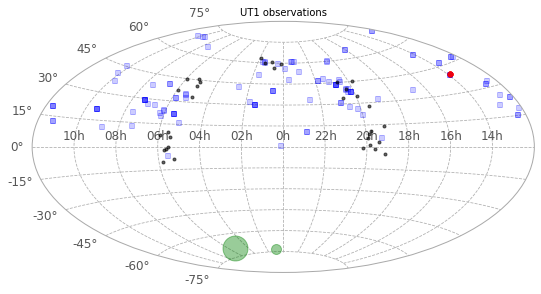

In [5]:
# Objet rechrercher dans le catalogue UT1 Mast
data_search='sn2019ein'

# Configuration du dessin
fig = plt.figure(figsize=(9,5))
# Configuration de la projecion cartographique du titre et grille 
ax = fig.add_subplot(111,projection='aitoff')
plt.grid(True,axis='both',linestyle='--')
plt.title('UT1 observations', fontsize=10)


# Lecture des données du catalogue UT1 Mast    
for ligne in data:
    if ligne[7]==data_search:
        marker_color='red'
        marker_alpha=0.8
        marker_label=''
        marker_type='o'
    else:
        marker_color='blue'
        marker_type='s'
        marker_alpha=0.2
        marker_label=''
    # RA et DEC en degré    
    ra=ligne[10]*u.deg
    dec=ligne[11]*u.deg
    # Configuration de la position en ICRS
    c = SkyCoord(ra, dec, frame='icrs')
    # RA et DEC en radian et repositionnement
    ra_rad = -c.ra.wrap_at(180 * u.deg).radian
    dec_rad = c.dec.radian
    # Affichage sur la projection
    plt.plot(ra_rad, dec_rad, marker=marker_type, color=marker_color, markersize=5, alpha=marker_alpha)

# Dessin des constellations
for ligne in data_milky_way:
    # RA et DEC en degré 
    ra=ligne[0]*u.deg
    dec=ligne[1]*u.deg
    # Configuration de la position en ICRS
    c = SkyCoord(ra, dec, frame='icrs')
     # RA et DEC en radian et repositionnement
    ra_rad = -c.ra.wrap_at(180 * u.deg).radian
    dec_rad = c.dec.radian
    # Affichage sur la projection
    plt.plot(ra_rad, dec_rad, 'o', color='black', markersize=3, alpha=0.6)

# Dessin des SMC LMC
for ligne in data_SMCLMC:
    name=ligne[2]
    # RA et DEC en degré 
    ra=ligne[0]*u.deg
    dec=ligne[1]*u.deg
    # Configuration de la position en ICRS
    c = SkyCoord(ra, dec, frame='icrs')
     # RA et DEC en radian et repositionnement
    ra_rad = -c.ra.wrap_at(180 * u.deg).radian
    dec_rad = c.dec.radian
    # Affichage sur la projection
    if name == "smc":
        marker_size=10
    else:
        marker_size=25
    plt.plot(ra_rad, dec_rad, 'o', color='green', markersize=marker_size, alpha=0.4)
    
# Modification des labels en heure
ax.set_xticklabels(['10h','08h','06h','04h','02h','0h','22h','20h','18h','16h','14h'])
# Affichage
plt.show()

###### ***Fig. 1.*** La marque rouge indique la position de la supernova 

### II. Hauteurs de la supernova à l'observatoire UT1
##### Les hauteurs de SN 2019ein vers 0h UT sont proche du zénith donc accéssible pour le site, cependant pour la soirée du 13 mai l'illumination de la lune (70% de surface éclairée) se fait ressentir sur les images.

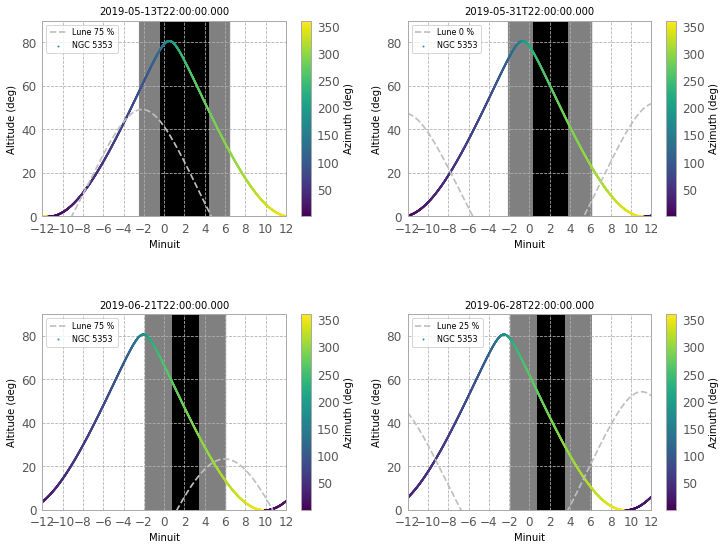

In [7]:
# Affichage des hauteurs
#       Example gallery            : astropy
# Ajout de l'illumination de la Lune 


# Nom de l'astre rechercher au CDS
name_astre='NGC 5353'

# Dates de l'observation
dates_obs = ['2019-05-14T00:00:00', '2019-06-01T00:00:00', '2019-06-22T00:00:00', '2019-06-29T00:00:00']
# soirées de l'observation à minnuit
dates_midnight = ['2019-05-14T00:00:00', '2019-06-01T00:00:00', '2019-06-22T00:00:00', '2019-06-29T00:00:00']
# % illumination de la Lune
moon_phase = [75,0,75,25]

# Valeur des coordonés de l'astre
coord_astre = SkyCoord.from_name(name_astre)

# taille du canevas
plt.figure(figsize=(12,9))

index = 0
for date in dates_obs:
    # initialisation de la date d'observation
    # module astropy
    date_observation = Time(date, format='isot', scale='utc') - utcoffset
    midnight = Time(dates_midnight[index], format='isot', scale='utc') - utcoffset
    # Azimuth et hauteur de l'astre
    # module astropy
    astre_altaz = coord_astre.transform_to(AltAz(obstime=date_observation,location=coord_ut1))
    # Azimuth et hauteur du Soleil
    # module astropy
    delta_midnight = np.linspace(-12, 12, 2000)*u.hour
    times_dates = midnight + delta_midnight
    frame_dates = AltAz(obstime=times_dates, location=coord_ut1)
    sunaltazs_dates = get_sun(times_dates).transform_to(frame_dates)
    # Azimuth, hauteur
    # module astropy
    # Illumination de la Lune module astroplan
    moon_dates = get_moon(times_dates)
    moonaltazs_dates = moon_dates.transform_to(frame_dates)
    #k=int(astroplan.moon_illumination(date_observation)*100)
    k=moon_phase[index]
    # Azimuth et hauteur de l'astre
    # module astropy
    astrealtazs_dates = astre_altaz.transform_to(frame_dates)
    #
    # Dessin 
    #
    plt.subplot(2, 2, index+1)
    plt.grid(True,axis='both',linestyle='--')
    # Tracé de la Lune, couleur et label avec % d'illumination
    plt.plot(delta_midnight, moonaltazs_dates.alt, color=[0.75]*3, ls='--', label='Lune '+str(k)+' %')
    # Tracé de l'astre, label et couleur
    plt.scatter(delta_midnight, astrealtazs_dates.alt,c=astrealtazs_dates.az, label=name_astre, lw=1, s=1,cmap='viridis') 
    # tracé de la nuit (pénombre)
    plt.fill_between(delta_midnight.to('hr').value, 0, 90,sunaltazs_dates.alt < -0*u.deg, color='0.5', zorder=0)
    # Tracé de la nuit total
    plt.fill_between(delta_midnight.to('hr').value, 0, 90,sunaltazs_dates.alt < -15*u.deg, color='k', zorder=0)
    # Trace du titre
    plt.title(str(date_observation), fontsize=10)
    # Tracé du label "Azimuh"
    plt.colorbar().set_label('Azimuth (deg)', fontsize=10)
    # tracé des légendes
    plt.legend(loc='upper left', fontsize=8)
    # Tracé de la grille Horaire
    plt.xlim(-12, 12)
    plt.xticks(np.arange(13)*2 -12)
    # Tracé de la grille d'altitude
    plt.ylim(0, 90)
    # Tracé du label "Minuit" sur axe X
    plt.xlabel('Minuit', fontsize=10)
    # Tracé du label "Altitude"
    plt.ylabel('Altitude (deg)', fontsize=10)
    index = index+1

# Affichage
plt.show()

###### ***Fig. 2.*** Hauteur de NGC 5353 et illumination et hauteur de la Lune pour les quatre soirées.

### III. Repérage de la supernova proche de la Galaxie NGC 5353
##### Pour indiquer le repérage les images des soirées ont d'abord été calibrées avec le logiciel **Iris** pour avoir des images "médian" (médian de 17 images de 300 sec) puis avec le logiciel **Aladin Sky Atlas** une calibration astrométrique est appliquée pour indiquer les coordonées **WCS**.

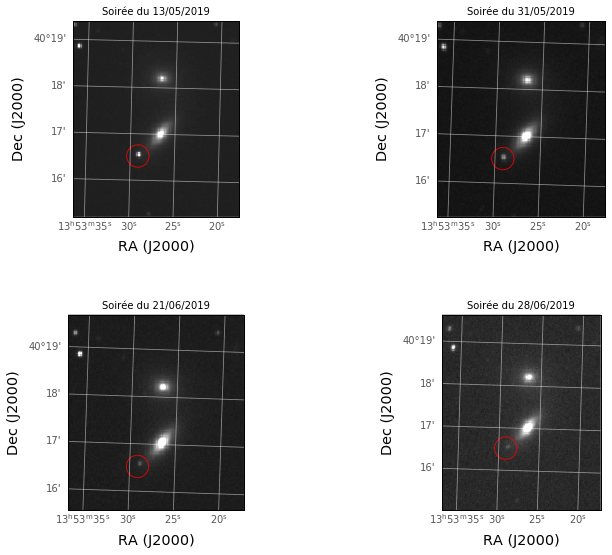

In [8]:
# Coordonées Aladin Sky Atlas
# Intitulée ATLAS 19ieo
coord_astre = SkyCoord.from_name('ATLAS 19ieo')
sn2019ein_ra = coord_astre.ra*u.deg
sn2019ein_dec = coord_astre.dec*u.deg

data_image = [['000115-20190513211556.fits',800,6000,'13/05/2019'],['000120-20190531215057.fits',200,3000,'31/05/2019'],
             ['000121-20190621232500.fits',200,3500,'21/06/2019'],['000122-20190628233900.fits',200,2000,'28/06/2019']]

# Affichage des images de référence
# Marquage de la supernova
fig = plt.figure(figsize=(12,9))
index = 0
for line in data_image:
    f1=aplpy.FITSFigure(data_image[index][0],figure=fig, subplot=(2,2,index+1))
    f1.add_grid()
    f1.tick_labels.set_font(size='small')
    f1.show_markers(sn2019ein_ra, sn2019ein_dec, edgecolor='red', facecolor='none', marker='o', s=500, alpha=0.8)
    f1.show_grayscale(vmin=data_image[index][1], vmax=data_image[index][2])
    plt.title('Soirée du ' + data_image[index][3],fontsize=10)
    index = index + 1

fig.canvas.draw()

###### ***Fig. 3.*** Repérage de sn 2019ein avec la galaxie NGC 5353. L'image du 28/06 est avec un filtre G Typ 2c, la qualité du ciel était bien moin bonne que les soirée précédente.

### IV. Recherche de la magnitude de sn 2019ein avec la formule de l'**AAVSO**
##### Lecture du fichier sn2019ein_UT1.csv qui contient les variables suivante sur la 2ème ligne puis applique la formule 
$$mag_{1}-mag_{2}=-2,5.\log_{10} (\frac{flux_{1}}{flux_{2}})$$



##### - ***JD***        : Jour julien de la mesure
##### - ***Vadu***      : Mesure de l'intensité de la variable
##### - ***Cadu***      : Mesure de l'intensité de la constante

##### La valeur *Vmag* de la constante a été prise du catalogue ***UCAC4***.

##### Lecture du fichier sn2019ein_AAVSO.csv qui contient toutes les mesures téléchargées sur le site de l'AAVSO et affichage des deux courbes

##### **Conclusion** : Une perte évidente de luminosité d'environ 0,8 magnitude entre le 13/05/219 et le 31/05/2019 et de 1,30 magnitude entre le 31/05/2019 et le 21/06/2019 qui se voit très bien sur les images précédentes. La courbe avec le filtre **CLS-CCD** varie peu avec les mesures "V" de l'AAVSO . La 4ème mesure est réalisée avec un filtre **G Typ 2c** et s'approche des mesures.

     JD      Magnitude Uncertainty HQuncertainty ... Credit  Vadu  Cadu
------------ --------- ----------- ------------- ... ------ ----- -----
2458617.4583        --          --            -- ...     -- 54147 33145
2458635.4583        --          --            -- ...     -- 21951 25021
2458656.4263        --          --            -- ...     --  8816 34638
2458656.4756        --          --            -- ...     --  5244 21151
2458663.4437        --          --            -- ...     --  4179 19978
    MJD      Mv   Band
---------- ----- ------
58616.9583 14.04 CLS
58634.9583 14.71 CLS
58655.9263 16.06 CLS
58655.9756 16.08 G
58662.9437 16.27 G


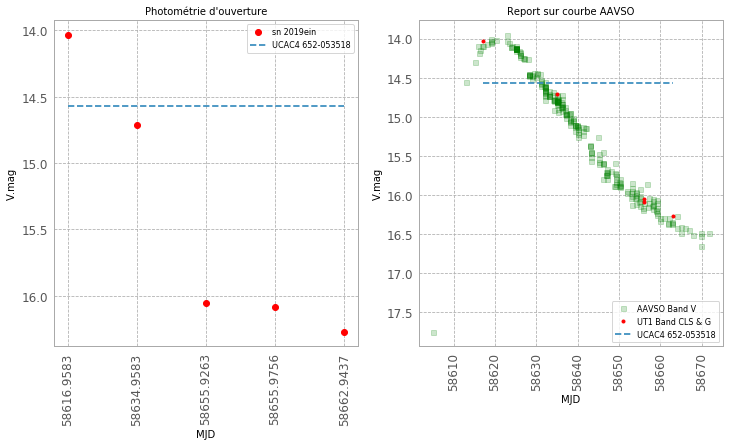

In [9]:
###### Calcul de la magnitude

# Affichage du fichier de mesure
print(data_sn2019ein_UT1)

# Affichage des magnitudes calculées
Vmag=[]
Cmag=[]
mjd=[]
print('    MJD      Mv   Band')
print('---------- ----- ------')

for line in data_sn2019ein_UT1:
    name_constante = line[7]
    band = line[4]
    Vadu = float(line[24])
    Cadu = float(line[25])
    Cmag_UCAC4 = float(line[14])
    Cmag.append(Cmag_UCAC4)
    t=Time(float(line[0]),format='jd')
    mjd.append(round(t.mjd,4))
    #
    # mag1 - mag2 = -2,5 log10 (flux1 / flux2) 
    #
    Vmag_calc = -2.5*(np.log10(Vadu/Cadu))+Cmag_UCAC4
    Vmag.append(Vmag_calc)
    print(round(t.mjd,4),round(Vmag_calc,2),band)
    
# Graph des mesures
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.gca().invert_yaxis()
plt.grid(True,axis='both',linestyle='--')
plt.plot(np.arange(len(data_sn2019ein_UT1)),Vmag,'o', color='red', label='sn 2019ein')
plt.plot(np.arange(len(data_sn2019ein_UT1)),Cmag, '--', label=name_constante)
plt.legend(loc='upper right', fontsize=8)
plt.xlabel('MJD',fontsize=10)
plt.ylabel('V.mag',fontsize=10)
plt.title("Photométrie d'ouverture",fontsize=10)
plt.xticks(np.arange(len(data_sn2019ein_UT1)),mjd,rotation=90)



# Graph de la courbe AAVSO
name_AAVSO='AAVSO'
name_UT1='UT1'
band='V'
band_UT1='CLS'

# Table AAVSO
x_AAVSO=[]
y_AAVSO=[]

for line in data_AAVSO:
    if line[4] == band:
        t=Time(float(line[0]),format='jd')
        x_AAVSO.append(round(t.mjd,4))
        y_AAVSO.append(float(line[1]))

# Graph de la courbe AAVSO et report des mesures
plt.subplot(1, 2, 2)
plt.gca().invert_yaxis()
plt.grid(True,axis='both',linestyle='--')
plt.plot(x_AAVSO,y_AAVSO,'s', color='green',markersize=5, alpha=0.2,label=name_AAVSO+" Band "+band )
plt.plot(mjd,Vmag,'o', color='red',markersize=3, alpha=1,label=name_UT1+" Band "+band_UT1+" & G")
plt.plot(mjd,Cmag, ls='--', label=name_constante)
plt.xlabel('MJD',fontsize=10)
plt.xticks(rotation=90)
plt.ylabel('V.mag',fontsize=10)
plt.legend(loc='lower right', fontsize=8)
plt.title("Report sur courbe AAVSO",fontsize=10)
plt.show()

###### ***Fig. 4.*** Calculs et étalonnages des mesures reportées sur la courbe de l'AAVSO

### V. NGC 5350 (Mrk 1485) & l'amas de galaxie.

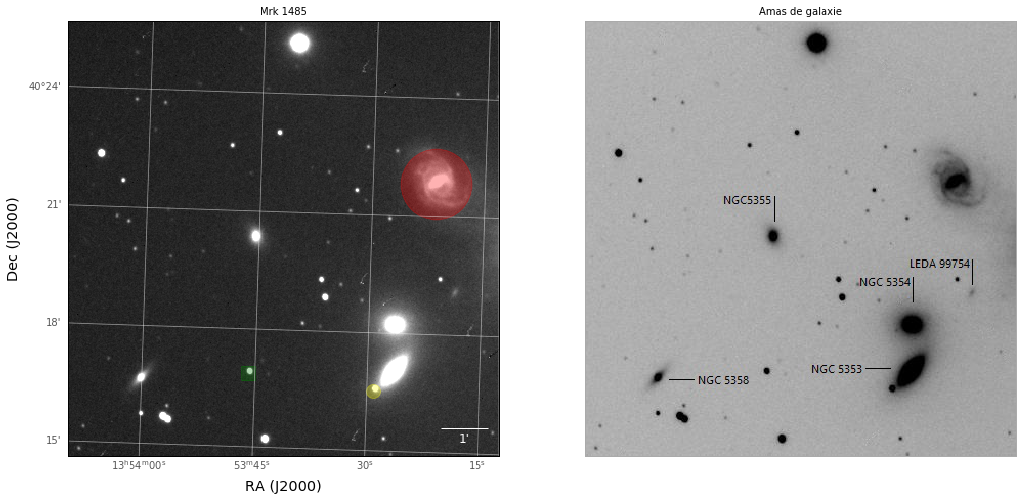

In [10]:
coord_astre = SkyCoord.from_name('ngc5350')
ngc5350_ra=coord_astre.ra*u.deg
ngc5350_dec=coord_astre.dec*u.deg
coord_astre = SkyCoord.from_name('UCAC4 652-053518', frame='icrs')
UCAC4_652_053518_ra=coord_astre.ra*u.deg
UCAC4_652_053518_dec=coord_astre.dec*u.deg

fig = plt.figure(figsize=(17,17))
f1=aplpy.FITSFigure('mrk1485-201905-4s-59x300-f1000.fits',figure=fig, subplot=(1,2,1))
f1.add_grid()
f1.tick_labels.set_font(size='small')
f1.show_grayscale(vmin=900, vmax=1300)
f1.add_scalebar(0.02, "1'", color='white')
f1.show_markers(ngc5350_ra, ngc5350_dec, edgecolor='red',facecolor='red', marker='o', s=5000, alpha=0.3)
f1.show_markers(UCAC4_652_053518_ra, UCAC4_652_053518_dec, edgecolor='green',facecolor='green', marker='s', s=200, alpha=0.3)
f1.show_markers(sn2019ein_ra, sn2019ein_dec, edgecolor='yellow', facecolor='yellow', marker='o', s=200, alpha=0.3)
plt.title('Mrk 1485',fontsize=10)

plt.subplot(1,2,2)
im = mpimg.imread( 'mrk1485-201905-4s-59x300-f1000.jpg')
plt.xticks([], [])
plt.yticks([], [])
plt.imshow(im)

plt.title('Amas de galaxie',fontsize=10)
fig.canvas.draw()

###### ***Fig. 5.*** Champ du groupe compact de galaxie HCG 68 contenant NGC 5350 (Galaxie de Markarian 1485, marque rouge). Etoile UCAC4 652-053518 d'étalonage marque  verte. SN 2019ein marque jaune. Sur l'image de droite une amélioration cosmétique a été effectuée pour supprimer les points chauds résultant de l'additions des cinquante-neuf images de 300 secondes de temps unitaire.